6.탐색적 데이터분석 사례 : iris

Contents
<div id="toc"></div>

# Step1. 데이터셋 일반정보

In [1]:
str(iris)             # 데이터셋의 전체 정보 확인

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


- 데이터셋의 형태는 data frame
- 150 개의 행(row)
- 5개의 컬럼
- Species 는 factor 타입 

다른 방법

In [3]:
class(iris)               #자료구조 확인
head(iris)
dim(iris)
table(iris$Species)

[1] "data.frame"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 150   5


    setosa versicolor  virginica 
        50         50         50 

<해석>
- 이 데이터셋의 자료구조는 data frame (열 선택시 $ 사용 가능)
- 총 5개의 열(변수) 을 포함. 앞의 4개는 수치 데이터. 5번째는 각 행에 대한 그룹 정보 포함 
- 이 데이터셋은 총 150 개의 행과 5개의 열로 구성
- 각 행들은 3개의 그룹중 하나 (setosa, versicolor, virginica)
- 각 그룹에 속한 행의 개수는 각각 50개씩 균등하다.

Note 1. 자료구조가 data frame 이면 열 데이터를 추출할 때 iris$Species가 가능. 만일 iris 가 matrix 이면 iris[,5], iris[,”Species”] 처럼 해야 한다.   
Note 2. 단순히 어떤 그룹이 있는지만 알아 보려면

In [4]:
unique(iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

위와 같이 Level 정보가 표시되면 Specis 열은 타입이 factor 임 

# Step2. 4개 변수에 대한 데이터 분포 확인

In [5]:
summary(iris[,1])
summary(iris[,2])
summary(iris[,"Petal.Length"])
summary(iris$Petal.Width)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.800   3.000   3.057   3.300   4.400 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.600   4.350   3.758   5.100   6.900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.100   0.300   1.300   1.199   1.800   2.500 

In [6]:
sd(iris[,1])  # Sepal.Length 
sd(iris[,2])  # Sepal.Width 
sd(iris[,3])  # Petal.Length 
sd(iris[,4])  # Petal.Width 

[1] 0.8280661

[1] 0.4358663

[1] 1.765298

[1] 0.7622377

Sepal.Width 는 데이터의 편차가 작고, Petal.Length 는 편차가 크다.

## Histogram 으로 분포 확인하기

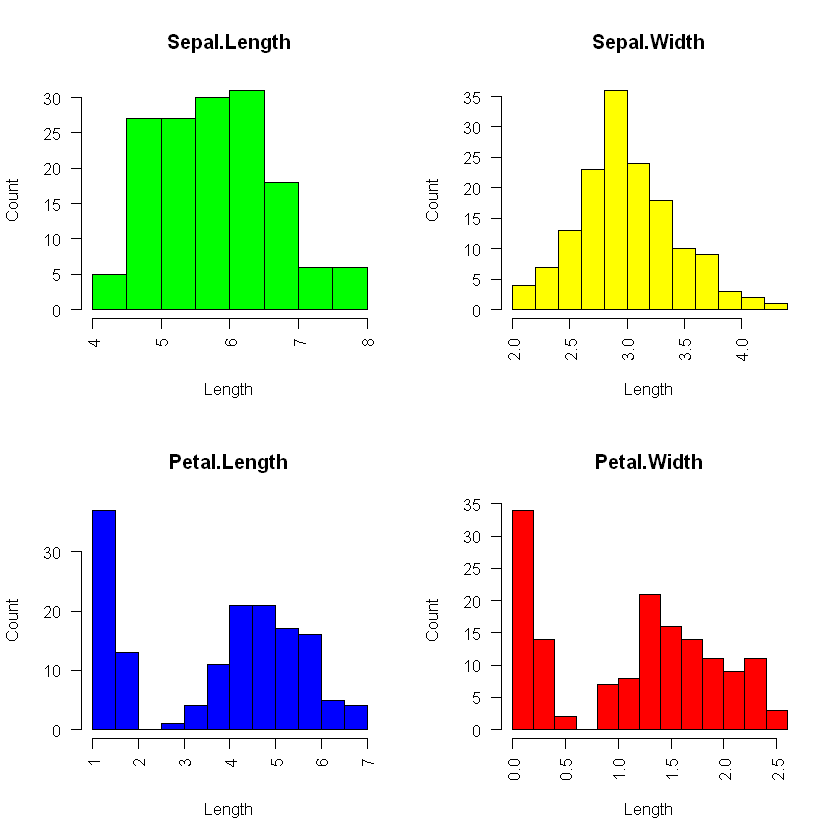

In [8]:
par(mfrow=c(2,2))         # 2x2 윈도우 생성

hist(iris[,1],                  # data
     main=colnames(iris)[1],    # 제목
     xlab ="Length",    # x축 레이블              
     ylab="Count",      # y축 레이블                     
     col="green",       # 막대 색
     las=2,             # x축 글씨방향(0~3) 
     breaks=10)         # x축 막대 개수 조절 

hist(iris[,2],                  # data
     main=colnames(iris)[2],    # 제목
     xlab ="Length",    # x축 레이블              
     ylab="Count",      # y축 레이블                     
     col="yellow",      # 막대 색
     las=2,             # x축 글씨방향(0~3) 
     breaks=10)         # x축 막대 개수 조절

hist(iris[,3],                  # data
     main=colnames(iris)[3],    # 제목
     xlab ="Length",    # x축 레이블              
     ylab="Count",      # y축 레이블                     
     col="blue",        # 막대 색
     las=2,             # x축 글씨방향(0~3) 
     breaks=10)         # x축 막대 개수 조절 

hist(iris[,4],                  # data
     main=colnames(iris)[4],    # 제목
     xlab ="Length",    # x축 레이블              
     ylab="Count",      # y축 레이블                     
     col="red",         # 막대 색
     las=2,             # x축 글씨방향(0~3) 
     breaks=10)         # x축 막대 개수 조절 

# Step3. 각 열 데이터에 대해 그룹별 분포를 확인

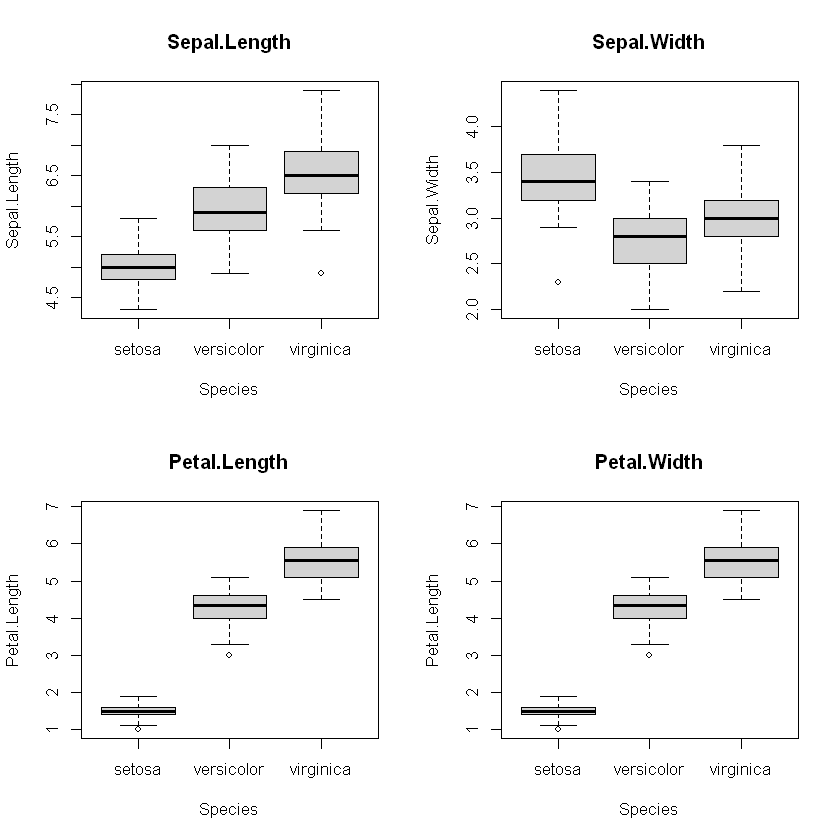

In [9]:
par(mfrow = c(2, 2))
boxplot(Sepal.Length~Species, data = iris, 
        main = "Sepal.Length")
boxplot(Sepal.Width~Species, data = iris, 
        main = "Sepal.Width")  
boxplot(Petal.Length~Species, data = iris, 
        main = "Petal.Length")  
boxplot(Petal.Length~Species, data = iris, 
        main = "Petal.Width") 

Sepal.Length~Species, data = iris   
= iris 데이터셋의 Sepal.Length에 대해 boxplot을 그리되 Species 에 따라 그룹을 구분하여 그리시오

<해석>
- 4개 변수에서 각 그룹간 데이터의 크기는 차이가 존재한다
- Sepal.width 와 Sepal.length 에서는 그룹간 데이터가 겹치는 부분이 넓다
- Setosa 품종의 경우는 petal.width 와 petal.length 에서 데이터의 편차가 매우 적다
- 이상치에 속하는 데이터가 일부 있다

## 산점도를 통해 확인

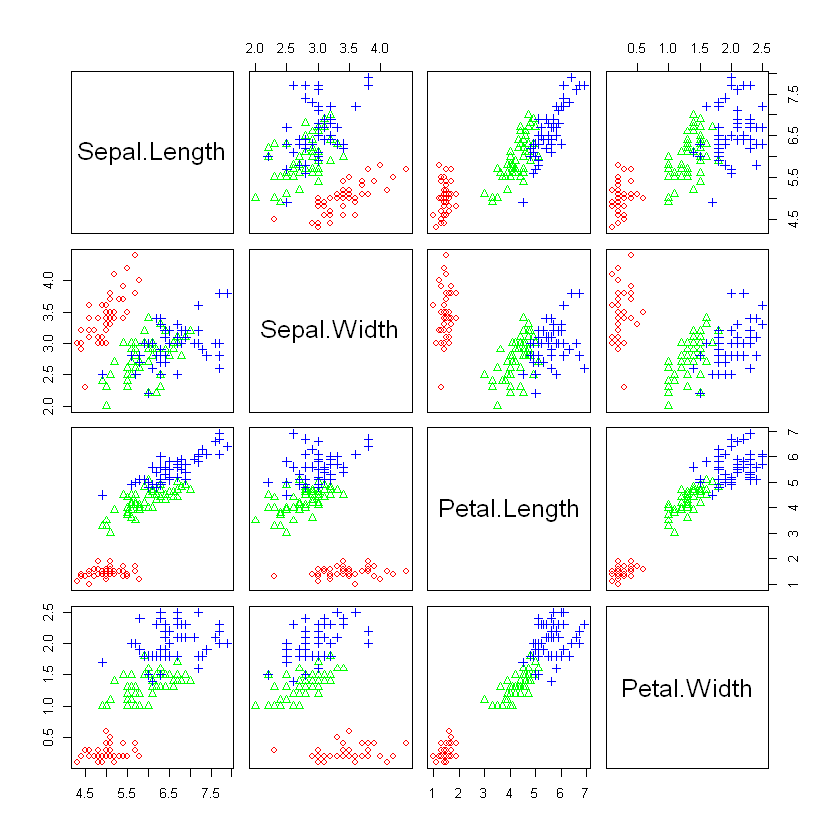

In [10]:
point <- as.numeric(iris$Species) # 포인트 모양
color <- c("red","green","blue")  # 포인트 컬러
pairs(iris[,-5], 
      pch=c(point),
      col=color[iris[,5]]  
)

빨강 : setosa, 초록 : versicolor, 파랑 : virginica 

<해석>
- 4개 변수에서 각 그룹간 데이터의 크기는 차이가 존재한다
- Sepal.length 와 petal.length, 그리고 petal.length  와 petal.width 는 강한 양의 상관 관계를 보인다.

## 변수간 상관도를 확인

In [11]:
cor(iris[,-5])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>